<a href="https://colab.research.google.com/github/atouammi/git_dem2/blob/main/Copy_of_Probability%26Statistics_Tutorial_2024_Atou_Koffi_KOUGBANHOUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMMI Bootcamp - Probability Distributions and Statistics

In [ ]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import colors
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d
import os
import matplotlib.pyplot as plt
import typing

# Introduction

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

# Distribution Functions

### Sigmoid (logistic) function

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

$$
\frac{d}{dx}\sigma(x) = σ(x)(1-σ(x))
$$

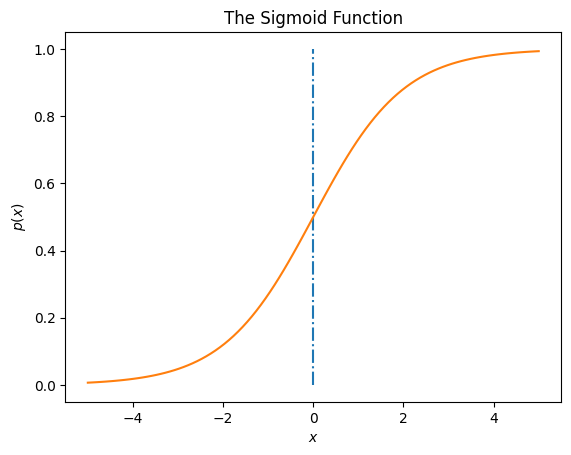

In [ ]:
def sigmoid(x: np.ndarray) -> np.ndarray:
  """Computes the sigmoid of given inputs
  Args:
    x: inputs of shape N X 1

  Returns:
    probs: shape N X 1
  """
  ##########################################################################
  #                      TODO: Implement this function                     #
  ##########################################################################
  # Replace "pass" statement with your code
  probs = 1/(1+np.exp(-x))
  ##########################################################################
  #                            END OF YOUR CODE                            #
  ##########################################################################
  return probs

x = np.linspace(-5, 5, 100)
y = sigmoid(x)
plt.plot(np.zeros(10), np.linspace(0,1, 10), "-.")
plt.title("The Sigmoid Function")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.plot(x,y)
plt.show()

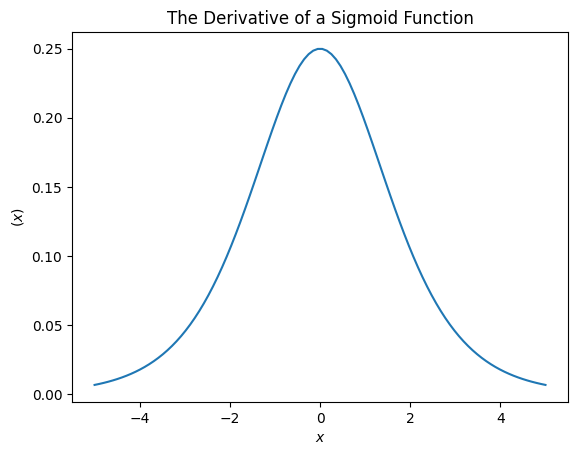

In [ ]:
def d_sigmoid(x: np.ndarray)->np.ndarray:
  """Computes the derivative of the sigmoid function
  Args:
    x: inputs of shape N X 1

  Returns:
    probs: shape N X 1
  """
  ##########################################################################
  #                      TODO: Implement this function                     #
  ##########################################################################
  # Replace "pass" statement with your code
  probs = sigmoid(x)*(1-sigmoid(x))
  ##########################################################################
  #                            END OF YOUR CODE                            #
  ##########################################################################
  return probs

x = np.linspace(-5, 5, 100)
y = d_sigmoid(x)

plt.title("The Derivative of a Sigmoid Function")
plt.xlabel("$x$")
plt.ylabel("$(x)$")
plt.plot(x, y)
plt.show()

### Softmax function


$$\sigma:\mathbb{R}^k \rightarrow (0,1)^k$$
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}}, i = 1,\dots,k.$$

For the better softmax, let
$$\sigma (z_i) = exp(log[\frac{e^{z_i}}{\sum e^{z_j}}]) = exp (z_i - log \sum e^{z_j})$$

The logsumexp trick is given by, let

$$y = log(\sum exp(x_i)) →$$
$$e^y = \sum exp(x_i) \rightarrow$$
$$e^y = e^c \sum exp(x_i) \rightarrow$$
$$y = c + log \sum exp(x_i -c)$$
let
$$c = max\lbrace x_1,\dots,x_n\rbrace.$$

In [ ]:
def softmax_function(logits: np.ndarray):
  """Computes the softmax function given logits
  Args:
    logits: size Number of samples (N) X Number of classes to distribute probability over (C)

  Returns:
    probability distribution over categorical variables
  """
  ##########################################################################
  #                      TODO: Implement this function                     #
  ##########################################################################
  # Replace "pass" statement with your code
  soft_res = np.exp(logits)/(np.sum(np.exp(logits),-1,keepdims=True))
  ##########################################################################
  #                            END OF YOUR CODE                            #
  ##########################################################################
  return soft_res


def better_softmax_function(logits: np.ndarray):
  """Computes the softmax function from logits using the more efficient logsumexp trick
  Args:
    logits: size Number of samples (N) X Number of classes to distribute probability over (C)

  Returns:
    probability distribution over categorical variables
  """

  def log_sum_exp(logits):
    ##########################################################################
    #                      TODO: Implement this function                     #
    ##########################################################################
    # Replace "pass" statement with your code
    c =  np.max(logits,-1, keepdims=True)



    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return c + np.log(np.sum(np.exp(logits-c),-1, keepdims= True))

  return np.exp(logits - log_sum_exp(logits))

In [ ]:
# Create random logits that the naive softmax function should be able to compute easily
np.random.seed(1234)
logits = np.random.normal(0,1, (5,3))
print(logits)
print("Using naive softmax:\n",softmax_function(logits))
print("Using Better softmax function:\n",better_softmax_function(logits))

[[ 0.47143516 -1.19097569  1.43270697]
 [-0.3126519  -0.72058873  0.88716294]
 [ 0.85958841 -0.6365235   0.01569637]
 [-2.24268495  1.15003572  0.99194602]
 [ 0.95332413 -2.02125482 -0.33407737]]
Using naive softmax:
 [[0.26283272 0.04985441 0.68731287]
 [0.200621   0.13341715 0.66596185]
 [0.60458288 0.1354262  0.25999092]
 [0.01781141 0.52983212 0.45235646]
 [0.75354774 0.03848288 0.20796938]]
Using Better softmax function:
 [[0.26283272 0.04985441 0.68731287]
 [0.200621   0.13341715 0.66596185]
 [0.60458288 0.1354262  0.25999092]
 [0.01781141 0.52983212 0.45235646]
 [0.75354774 0.03848288 0.20796938]]


In [ ]:
# Create logits with large values and observe what the naive softmax produces as opposed the better softmax function
np.random.seed(1234)
big_logits = np.random.randint(1000, 2000, size=(5,3))
big_logits

array([[1815, 1723, 1294],
       [1053, 1204, 1372],
       [1664, 1655, 1689],
       [1279, 1233, 1154],
       [1030, 1683, 1158]])

In [ ]:
softmax_function(big_logits)

<ipython-input-18-fa58743a92e0>:13: RuntimeWarning: overflow encountered in exp
  soft_res = np.exp(logits)/(np.sum(np.exp(logits),-1,keepdims=True))
<ipython-input-18-fa58743a92e0>:13: RuntimeWarning: invalid value encountered in divide
  soft_res = np.exp(logits)/(np.sum(np.exp(logits),-1,keepdims=True))


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
better_softmax_function(big_logits)

array([[1.00000000e+000, 1.10893902e-040, 5.40225311e-227],
       [2.88443179e-139, 1.09276566e-073, 1.00000000e+000],
       [1.38879439e-011, 1.71390843e-015, 1.00000000e+000],
       [1.00000000e+000, 1.05306174e-020, 5.16642063e-055],
       [2.54509101e-284, 1.00000000e+000, 9.89457172e-229]])

In [ ]:
# Create logits with very small values and observe what the naive softmax function produces as opposed to the better softmax function
np.random.seed(1234)
small_logits = np.random.randint(-2000, -1000, size = (5,3))
small_logits

array([[-1185, -1277, -1706],
       [-1947, -1796, -1628],
       [-1336, -1345, -1311],
       [-1721, -1767, -1846],
       [-1970, -1317, -1842]])

In [ ]:
softmax_function(small_logits)

<ipython-input-18-fa58743a92e0>:13: RuntimeWarning: invalid value encountered in divide
  soft_res = np.exp(logits)/(np.sum(np.exp(logits),-1,keepdims=True))


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
better_softmax_function(small_logits)

array([[1.00000000e+000, 1.10893902e-040, 5.40225311e-227],
       [2.88443179e-139, 1.09276566e-073, 1.00000000e+000],
       [1.38879439e-011, 1.71390843e-015, 1.00000000e+000],
       [1.00000000e+000, 1.05306174e-020, 5.16642063e-055],
       [2.54509101e-284, 1.00000000e+000, 9.89457172e-229]])

# Gaussian Distributions

In [ ]:
scalar = typing.Union[float, int]


Write a function to compute the probability density function for a univariate gaussian distribution.
$$
p(x| \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2 \right)
$$

In [ ]:
def univariate_gaussian_pdf(x: np.ndarray,
                            mu: scalar,
                            sigma: scalar):
  """Computes the probability density function for a univariate gaussian distribution
  Args:
    x: the feature variable
    mu: the mean value
    sigma: the standard deviation value

  Returns:
    prob: the probability density function
  """
  ##########################################################################
  #                      TODO: Implement this function                     #
  ##########################################################################
  # Replace "pass" statement with your code
  prob = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(1/2*sigma**2)*(x-mu)**2)
  ##########################################################################
  #                            END OF YOUR CODE                            #
  ##########################################################################
  return prob

In [ ]:
x = np.linspace(-5, 5, 100)
mean, sigma = 0., 0.7
y = univariate_gaussian_pdf(x, mean, sigma)

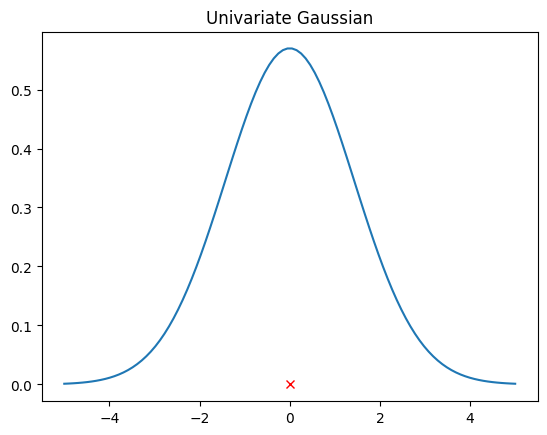

In [ ]:
def plot_univariate_gaussian(x: np.ndarray):
  y = univariate_gaussian_pdf(x, mean, sigma)
  plt.plot(x, y)
  plt.plot(mean, 0, marker="x", markeredgecolor="red")
  plt.title("Univariate Gaussian")

plot_univariate_gaussian(x)

Write a function that computes the probability density function for a  multivariate Gaussian distribution

$$
\mathcal{N}(y|\mu, Σ) = \frac{1}{(2\pi)^{D/2}|Σ|}\exp\left(-\frac{1}{2}(y-\mu)^TΣ^{-1}(y-\mu)\right)
$$

In [ ]:
def multivariate_gaussian_pdf(X: np.ndarray,
                              mean: np.ndarray,
                              covariance: np.ndarray):
  """Multivariate Gaussian PDF"""
  D = X.shape[0]
  ##########################################################################
  #                      TODO: Implement this function                     #
  ##########################################################################
  # Replace "pass" statement with your code
  prob = 1/((2*np.pi)**(D/2)*np.linalg.det(covariance))*np.exp(-0.5*(X-mean).T@np.linalg.inv(covariance)@(X-mean))
  ##########################################################################
  #                            END OF YOUR CODE                            #
  ##########################################################################
  return prob

# Maximum Likelihood Estimation - For Normal Distribution

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this tutorial, we are interested in finding good parameters $\boldsymbol\theta$.

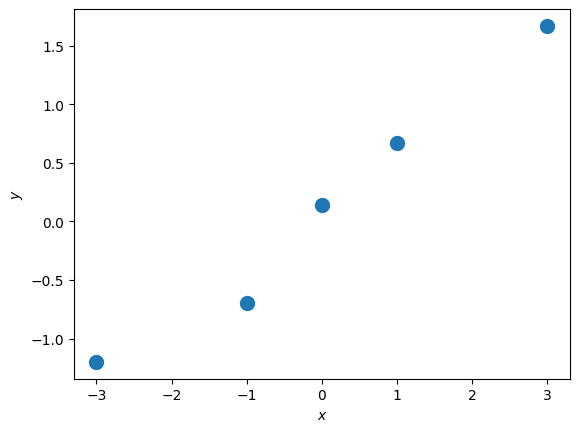

In [ ]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [ ]:
def maximum_likelihood_estimate(X: np.ndarray, y: np.ndarray):

    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)

    N, D = X.shape
    ##########################################################################
    #                      TODO: Implement this function                     #
    ##########################################################################
    # Replace "pass" statement with your code


    maximum = np.linalg.inv((X.T@X))@X.T@y
    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return maximum

In [ ]:
# get maximum likelihood estimate
theta_ml = maximum_likelihood_estimate(X,y)# Write your code here.
print(theta_ml)


[[0.499]]


In [ ]:
def predict_with_estimate(Xtest: np.ndarray, theta: np.ndarray):

    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector

    ##########################################################################
    #                      TODO: Implement this function                     #
    ##########################################################################
    # Replace "pass" statement with your code
    pass
    prediction = Xtest*theta_ml
    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return prediction

Text(0, 0.5, '$y$')

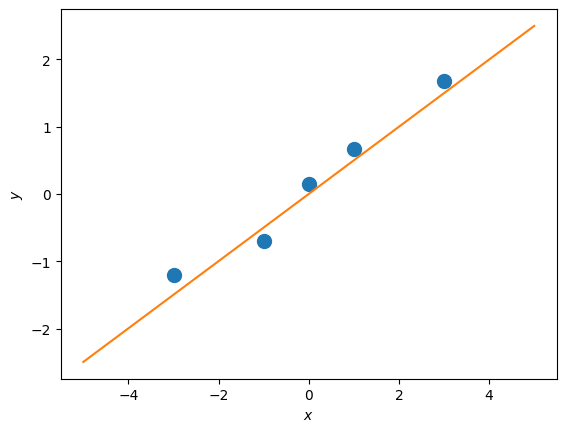

In [ ]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

assert not np.array_equal(ml_prediction, Xtest), "predict_with_estimate not implemented"

# plot
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")